In [125]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

curdir = Path('./')

In [126]:
# TEST SET validation data
test_validation_data = pd.DataFrame()
for f in curdir.glob('eval*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    # Parameter configuration (not saved in runs!!)
    # The weights are relative to classes in alphabetical order:
    # AddToCart, None, SearchDatabase, SearchMemory, SpecifyInfo
    if filename[5:]=='20210828-135516':
        weights = "1.0, 0.9, 1.0, 3.0, 0.8"
    elif filename[5:]=='20210828-153524':
        weights = "1.0, 0.9, 1.0, 2.0, 0.8"
    elif filename[5:]=='20210828-163541':
        weights = "1.0, 0.9, 0.95, 2.0, 0.8"
    elif filename[5:]=='20210828-173521':
        weights = "1.0, 0.9, 0.85, 3.0, 0.8"
    elif filename[5:]=='20210828-185724':
        weights = "1.0, 0.9, 0.8, 3.5, 0.75"
    elif filename[5:]=='20210828-150402' or filename[5:]=='20210828-205725' or filename[5:]=='20210828-230723':
        weights = "??, ??, ??, ??, ??"
    else:
        weights = "1.0, 0.9, 0.85, 3.0, 0.8"
    df['weights'] = [weights]    
    test_validation_data = pd.concat([test_validation_data, df])
print(test_validation_data.head(20))
print(test_validation_data.shape)

   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.854178           4.380371            0.789539   
0         0.846952           5.993121            0.791954   
0         0.856587           4.593089            0.792096   
0         0.857143           4.570284            0.795883   
0         0.853993           4.398207            0.792229   
0         0.852325           4.605227            0.785384   
0         0.855661           4.323701            0.789262   
0         0.858440           4.623870            0.804268   
0         0.854549           4.531001            0.800184   
0         0.854364           4.480988            0.801401   
0         0.859737           4.284719            0.798813   
0         0.854178           4.447966            0.793049   
0         0.857143           4.635254            0.797092   
0         0.853993           4.450030            0.798850   
0         0.856587           4.399322            0.801858   
0         0.858255      

In [127]:
df_classes = pd.DataFrame()
for f in curdir.glob('classes*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    df_classes = pd.concat([df_classes, df])
print(df_classes.head())
print(df_classes.shape)

                0                 filename
0       AddToCart  classes-20210829-152820
1            None  classes-20210829-152820
2  SearchDatabase  classes-20210829-152820
3    SearchMemory  classes-20210829-152820
4     SpecifyInfo  classes-20210829-152820
(160, 2)


In [128]:
# Training data statistics
training_stat = pd.DataFrame()
for f in curdir.glob('stats*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    training_stat = pd.concat([training_stat, df])
print(training_stat.head())
print(training_stat.shape)

       Training Loss  Valid. Loss  Valid. Accur. class.  \
epoch                                                     
1           1.183742     1.121508              0.844008   
2           1.126381     1.108489              0.845147   
3           1.102654     1.099548              0.853117   
4           1.086546     1.089359              0.859379   
5           1.070644     1.080110              0.863934   

       Valid. Accur. mult.label Training Time Validation Time  \
epoch                                                           
1                      0.905209       0:08:27         0:00:27   
2                      0.913464       0:08:34         0:00:27   
3                      0.930544       0:08:31         0:00:27   
4                      0.941076       0:08:27         0:00:27   
5                      0.942215       0:08:25         0:00:27   

                                                 metrics  \
epoch                                                      
1      {'a

In [129]:
# Training validazione data
validation_data = pd.DataFrame()
for f in curdir.glob('testdata*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    validation_data = pd.concat([validation_data, df])
print(validation_data.head())
print(validation_data.shape)

   epoch  batchnum                                     actions_logits  \
0      1         1  [[0.00022669467, 0.99954635, 0.00014672453, 4....   
1      1         2  [[3.9816754e-05, 0.99993706, 9.982337e-06, 5.3...   
2      1         3  [[1.1716689e-05, 4.749046e-06, 5.243937e-06, 7...   
3      1         4  [[0.99993145, 1.383598e-05, 5.140159e-06, 1.06...   
4      1         5  [[9.2726084e-05, 0.0010338974, 2.4307932e-05, ...   

                         actions_labels  \
0  [1, 4, 2, 4, 0, 1, 1, 4, 4, 0, 1, 2]   
1  [1, 4, 2, 2, 0, 1, 2, 1, 1, 1, 1, 4]   
2  [4, 1, 1, 1, 4, 2, 1, 2, 0, 1, 1, 1]   
3  [0, 0, 1, 2, 0, 1, 4, 4, 0, 1, 1, 4]   
4  [1, 4, 2, 4, 0, 3, 1, 1, 2, 4, 1, 1]   

                                   attributes_logits  \
0  [[0.000315801, 0.0002742104, 0.008575827, 0.00...   
1  [[0.00011521527, 8.390182e-05, 0.0052792653, 0...   
2  [[9.704663e-05, 8.9460504e-05, 0.94356424, 0.0...   
3  [[5.0596205e-05, 7.391092e-05, 0.013133991, 0....   
4  [[6.1832594e-05, 8.

In [130]:
# Data analysis 
case_study = test_validation_data[test_validation_data['weights'] == "1.0, 0.9, 0.85, 3.0, 0.8"]
print(case_study.shape)
print(f"MAX action accuracy: {max(case_study['action_accuracy'])}, MAX attribute accuracy: {max(case_study['attribute_accuracy'])}")
print(case_study)
print('Action accuracy order')
print(case_study.sort_values(by=['action_accuracy'], ascending=False))
print('Attribute accuracy order')
print(case_study.sort_values(by=['attribute_accuracy'], ascending=False))
print('Order by act_acc+att_acc-act_per')
perplexity_weight_full = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']
case_study.insert(case_study.shape[1], 'perplexity_weight_full', perplexity_weight_full)
perplexity_weight_cent = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']/100
case_study.insert(case_study.shape[1], 'perplexity_weight_cent', perplexity_weight_cent)
perplexity_weight_cent_halved = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']/200
case_study.insert(case_study.shape[1], 'perplexity_weight_cent_halved', perplexity_weight_cent_halved)
print(case_study)

(25, 7)
MAX action accuracy: 0.8604780433574208, MAX attribute accuracy: 0.8050887334395045
   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.854178           4.380371            0.789539   
0         0.856587           4.593089            0.792096   
0         0.857143           4.570284            0.795883   
0         0.855661           4.323701            0.789262   
0         0.858440           4.623870            0.804268   
0         0.854549           4.531001            0.800184   
0         0.854364           4.480988            0.801401   
0         0.859737           4.284719            0.798813   
0         0.854178           4.447966            0.793049   
0         0.857143           4.635254            0.797092   
0         0.856587           4.399322            0.801858   
0         0.858255           4.283419            0.803142   
0         0.852140           4.582262            0.784070   
0         0.853622           4.152028            0.795

In [131]:
print("Perplexity weight full")
print(case_study.sort_values(by=['perplexity_weight_full'], ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'perplexity_weight_full', 'perplexity_weight_cent', 'perplexity_weight_cent_halved']])
print("Perplexity weight cent")
print(case_study.sort_values(by=['perplexity_weight_cent'], ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'perplexity_weight_full', 'perplexity_weight_cent', 'perplexity_weight_cent_halved']])
print("Perplexity weight cent and halved")
print(case_study.sort_values(by=['perplexity_weight_cent_halved'], ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'perplexity_weight_full', 'perplexity_weight_cent', 'perplexity_weight_cent_halved']])

Perplexity weight full
   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.853622           4.152028            0.795476   
0         0.856958           4.200914            0.799446   
0         0.858255           4.283419            0.803142   
0         0.859737           4.284719            0.798813   
0         0.855661           4.323701            0.789262   
0         0.856587           4.340371            0.790465   
0         0.855290           4.365465            0.797576   
0         0.855290           4.366705            0.795873   
0         0.854178           4.380371            0.789539   
0         0.856587           4.399322            0.801858   
0         0.851584           4.428542            0.793953   
0         0.854178           4.447966            0.793049   
0         0.857143           4.464701            0.799848   
0         0.854734           4.474032            0.800208   
0         0.854364           4.480988            0.801401   
0

In [132]:
case_study.describe()


,action_accuracy,action_perplexity,attribute_accuracy,perplexity_weight_full,perplexity_weight_cent,perplexity_weight_cent_halved
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.855646,4.475628,0.796225,-2.823757,1.607114,1.629492
std,0.002276,0.191655,0.005323,0.193506,0.007696,0.007291
min,0.851584,4.152028,0.784070,-3.450530,1.590388,1.613299
25%,0.854178,4.365465,0.793049,-2.944406,1.601686,1.624987
50%,0.855290,4.464701,0.795883,-2.807711,1.607578,1.630174
75%,0.857143,4.582262,0.800184,-2.712598,1.612344,1.634667
max,0.860478,5.091894,0.805089,-2.502930,1.620210,1.642888


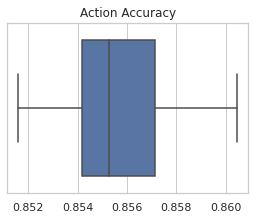

In [133]:
sns.set_theme(style="whitegrid")
bp = sns.boxplot(x=case_study["action_accuracy"], data=case_study)
bp.set_title('Action Accuracy')
bp.set_xlabel('')
plt.rcParams["figure.figsize"] = (4.32,3.14)
plt.savefig("./plots/boxplot-action_accuracy.png")

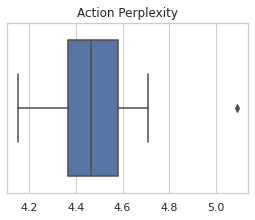

In [134]:
sns.set_theme(style="whitegrid")
bp = sns.boxplot(x=case_study["action_perplexity"], data=case_study)
bp.set_title('Action Perplexity')
bp.set_xlabel('')
plt.rcParams["figure.figsize"] = (4.32,3.14)
plt.savefig("./plots/boxplot-action_perplexity.png")

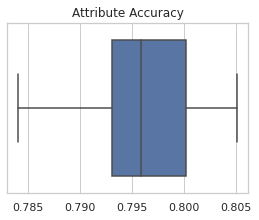

In [135]:
sns.set_theme(style="whitegrid")
bp = sns.boxplot(x=case_study["attribute_accuracy"], data=case_study)
bp.set_title('Attribute Accuracy')
bp.set_xlabel('')
plt.rcParams["figure.figsize"] = (4.32,3.14)
plt.savefig("./plots/boxplot-attribute_accuracy.png")

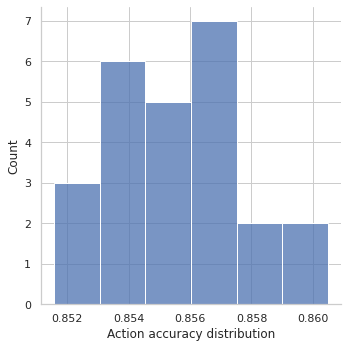

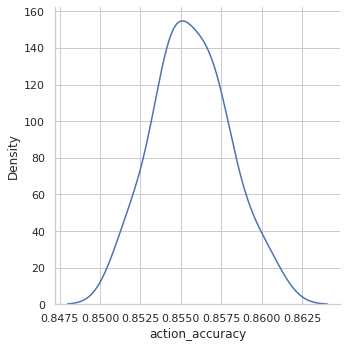

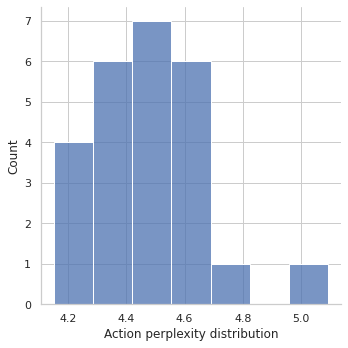

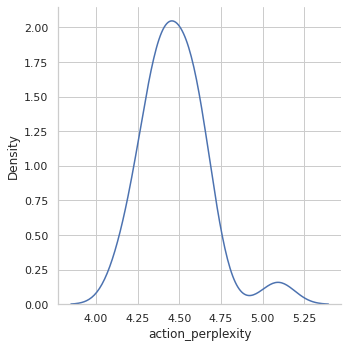

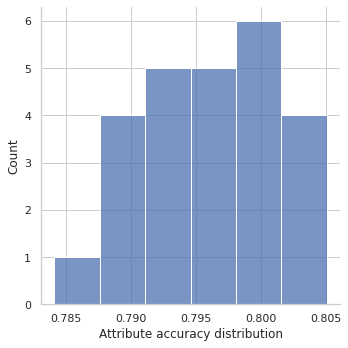

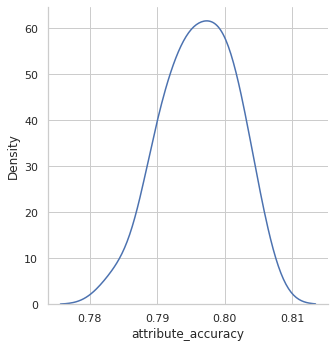

In [136]:
dp = sns.displot(case_study, x="action_accuracy")
dp.set(xlabel='Action accuracy distribution')
plt.rcParams["figure.figsize"] = (4.32,3.14)
plt.savefig("./plots/action_accuracy_distribution.png")
sns.displot(case_study, x="action_accuracy", kind='kde')
dp = sns.displot(case_study, x="action_perplexity")
dp.set(xlabel='Action perplexity distribution')
plt.rcParams["figure.figsize"] = (4.32,3.14)
plt.savefig("./plots/action_perplexity_distribution.png")
sns.displot(case_study, x="action_perplexity", kind="kde")
dp = sns.displot(case_study, x="attribute_accuracy")
dp.set(xlabel='Attribute accuracy distribution')
plt.rcParams["figure.figsize"] = (4.32,3.14)
plt.savefig("./plots/attribute_accuracy_distribution.png")
sns.displot(case_study, x="attribute_accuracy", kind="kde")


In [137]:
# Select best case
choice = max(case_study['perplexity_weight_cent'])
df_test_validation = case_study[case_study['perplexity_weight_cent']==choice]
print(df_test_validation)
filename = df_test_validation['filename'][0]
training_filename = f"stats{filename[4:]}"
validation_filename = f"testdata{filename[4:]}"
print(f"{training_filename} {validation_filename}")
df_training = training_stat[training_stat['filename']==training_filename]
df_validation = validation_data[validation_data['filename']==validation_filename]
print(f"Training statistics dimension: {df_training.shape}")
print(f"Validazione training statistics dimension: {df_validation.shape}")

   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.860478           4.535673            0.805089   

                                    confusion_matrix  \
0  [[756.0, 48.0, 8.0, 4.0, 12.0], [17.0, 1030.0,...   

                                           category              filename  \
0  B12-E6-H768-LR 5e-05 - eps 1e-08 - ACT - softmax  eval-20210829-034246   

                    weights  perplexity_weight_full  perplexity_weight_cent  \
0  1.0, 0.9, 0.85, 3.0, 0.8               -2.870106                 1.62021   

   perplexity_weight_cent_halved  
0                       1.642888  
stats-20210829-034246 testdata-20210829-034246
Training statistics dimension: (6, 9)
Validazione training statistics dimension: (1758, 10)


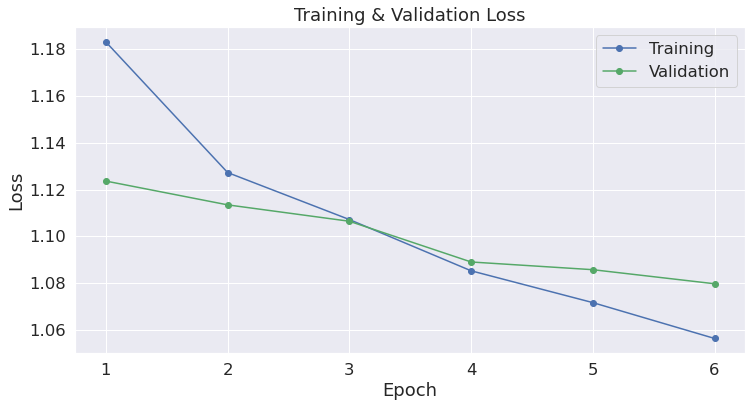

In [138]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_training['Training Loss'], 'b-o', label="Training")
plt.plot(df_training['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
epochs = 6
plt.xticks([x+1 for x in range(epochs)])

plt.savefig(f"./plots/loss-{df_test_validation['category'][0]}.png")


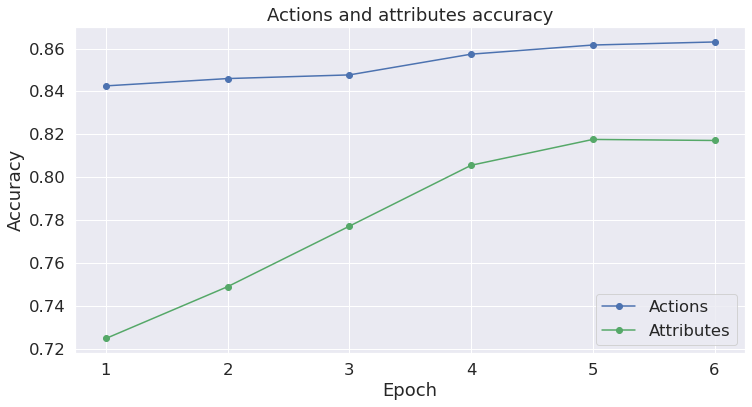

In [139]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

act_acc = [x['action_accuracy'] for x in df_training.metrics]
att_acc = [x['attribute_accuracy'] for x in df_training.metrics]
x_ticks = [x for x in range(len(act_acc))]

# Plot the learning curve.
plt.plot(act_acc, 'b-o', label="Actions")
plt.plot(att_acc, 'g-o', label="Attributes")

# Label the plot.
plt.title("Actions and attributes accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(ticks = x_ticks, labels = [str(x+1) for x in x_ticks])

plt.savefig(f"./plots/accuracy-{df_test_validation['category'][0]}.png")

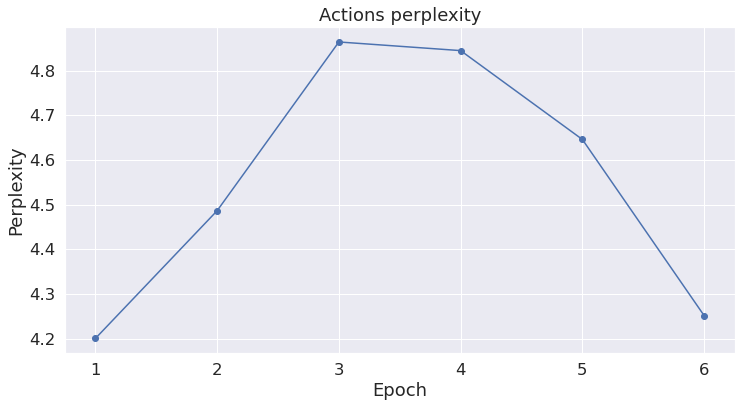

In [140]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

act_per = [x['action_perplexity'] for x in df_training.metrics]
x_ticks = [x for x in range(len(act_per))]

# Plot the learning curve.
plt.plot(act_per, 'b-o')

# Label the plot.
plt.title("Actions perplexity")
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.xticks(ticks = x_ticks, labels = [str(x+1) for x in x_ticks])

plt.savefig(f"./plots/perplexity-{df_test_validation['category'][0]}.png")

original:
[[ 756.   48.    8.    4.   12.]
 [  17. 1030.   33.   12.   36.]
 [  12.  229.  795.   60.   20.]
 [   0.    4.   21.   61.   18.]
 [   8.   75.   87.   49. 2002.]]
transpose:
[[ 756.   17.   12.    0.    8.]
 [  48. 1030.  229.    4.   75.]
 [   8.   33.  795.   21.   87.]
 [   4.   12.   60.   61.   49.]
 [  12.   36.   20.   18. 2002.]]


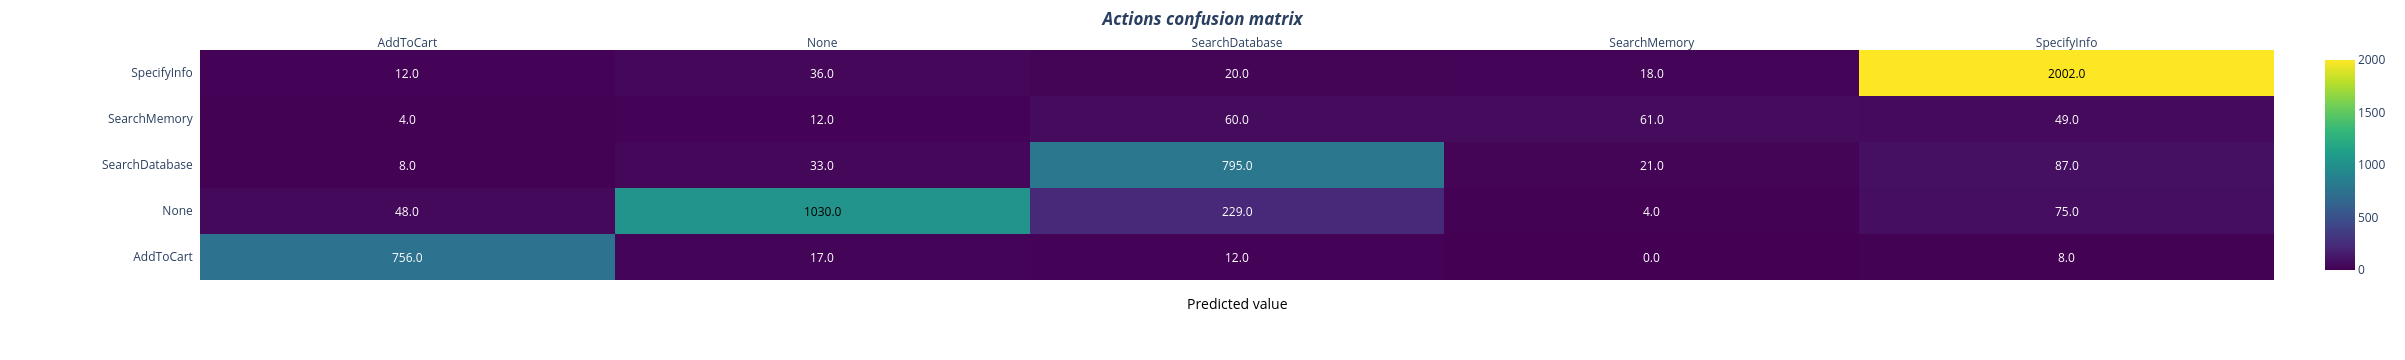

In [141]:
# Confusion matrix
znp = np.array(df_test_validation.confusion_matrix[0])
print("original:")
print(znp)
z = znp.transpose()
print("transpose:")
print(z)
x = ['AddToCart', 'None', 'SearchDatabase', 'SearchMemory', 'SpecifyInfo']
y = ['AddToCart', 'None', 'SearchDatabase', 'SearchMemory', 'SpecifyInfo']
     
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]
     
# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Actions confusion matrix</b></i>',title_x=0.5
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.25,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()
# fig.write_image("plots/action_confusion_matrix.png")